# Programming for Data Analytics - Analytics Task Two

Prepared by Samalie Piwan   
Email : spiwan@andrew.cmu.edu

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Loading

In [145]:
data = pd.read_csv('penguins_size.csv')

In [146]:
data.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


### 2. Data Preprocessing

In [147]:
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Observations**

The head() function prints out the first n rows of the dataset. Because we specified the paramter n as 10, the function above prints the first 10 rows.

This dataset contains 7 columns containing the statistics of species of penguins grouped by island. These fields are:
- species
- island
- culmen_length_mm
- culmen_depth_mm
- flipper_length_mm
- body_mass_g
- sex

We can also observe that some columns in the dataset contain missing values

In [148]:
data.tail(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


**Observations**

The tail() function prints out the last n rows of the dataset. Because we specified the paramter n as 10, the function above prints the last 10 rows.

We can also observe that the dataset has 343 rows

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The info() function prints out the details of the columns in  the dataset, in a range from 0 to n-1, where n is the number of columns in the dataset.

The details printed are column number, column name, length of data in the row, whether or not the column should contain null data and finally, the datatype expected in the column.

In [150]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

The line of code above finds the sum of the number of null values in each column. We observe that species and island have no null values, culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g have 2 missing values each, and sex has 10 missing values

### b. Handle missing values

**i. Determine and apply the best approach to address missing values based on the nature of the data (e.g., imputation, removal, or other methods).**

To handle missing data, I have opted to use imputation instead of dropping rows, to reduce information loss. Imputation is the process of replacing missing values with the mean or median value for numerical values, or the mode value for categorical values

In [151]:
# Handle missing values in culmen_length_mm, culmen_depth_mm, flipper_length_mm and body_mass_g columns using the mean value
data["culmen_length_mm"] = data["culmen_length_mm"].fillna(data["culmen_length_mm"].mean())
data["culmen_depth_mm"] = data["culmen_depth_mm"].fillna(data["culmen_depth_mm"].mean())
data["flipper_length_mm"] = data["flipper_length_mm"].fillna(data["flipper_length_mm"].mean())
data["body_mass_g"] = data["body_mass_g"].fillna(data["body_mass_g"].mean())

# Handle missing values in sex column using the mode value
data["sex"] = data["sex"].fillna(data["sex"].mode()[0])

# Check if the data still has missing values
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**ii. Convert data types if necessary to ensure consistency and compatibility for analysis.**

No conversions have been done as the values are all in the correct datatype

### c. Check for duplicate values:

**i. Investigate if there are any duplicate records in the dataset.**

In [152]:
duplicated_mask = data.duplicated()
duplicated_data = data[duplicated_mask]
duplicated_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


**ii. If duplicates exist, decide on and apply an appropriate method for handling them that aligns with the dataset's
context.**

The dataset has no duplicates

### 3. Data Exploration

#### a. What are the basic statistics and distributions of the penguin size measurements, such as culmen length, culmen depth, flipper length, and body mass?

In [153]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


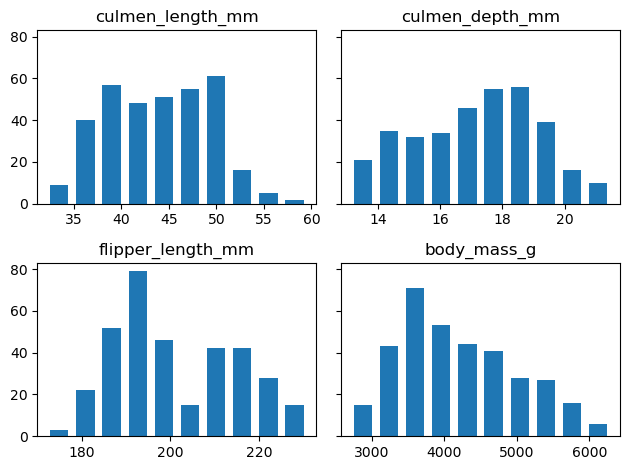

In [154]:
# Plot distribution plots to describe the data
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument
axs[0][0].hist(data["culmen_length_mm"], rwidth=0.7)
axs[0][0].set_title("culmen_length_mm")

axs[0][1].hist(data["culmen_depth_mm"], rwidth=0.7)
axs[0][1].set_title("culmen_depth_mm")

axs[1][0].hist(data["flipper_length_mm"], rwidth=0.7)
axs[1][0].set_title("flipper_length_mm")

axs[1][1].hist(data["body_mass_g"], rwidth=0.7)
axs[1][1].set_title("body_mass_g")

plt.show()

The penguin size measurements distributions show a normal distribution

**b. Compute and visualize the pairwise correlations between numerical columns (culmen length, culmen depth, flipper length, body mass) to identify any significant relationships between these features. Use a correlation matrix.**

<Axes: >

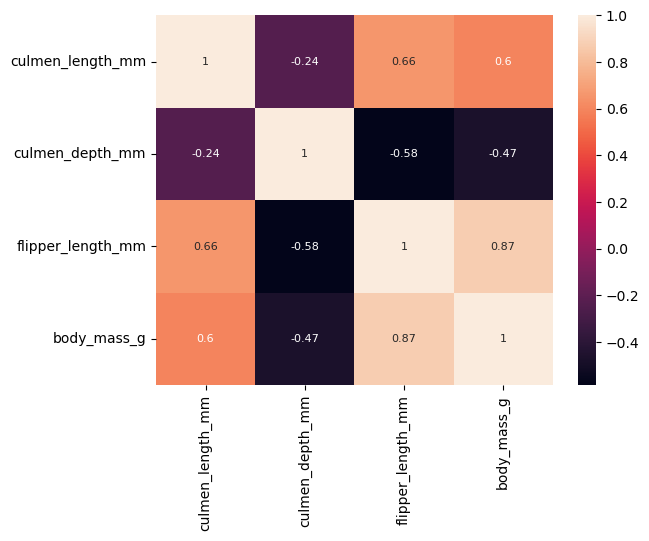

In [155]:
# Get the correlation between the predictor variables
correlation_matrix = data.corr(numeric_only = True)
# Plot the heatmap
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8})

**c. Examine the distribution of penguin species in the dataset to understand how many samples are available for each species. This can provide insights into the dataset's class balance.**

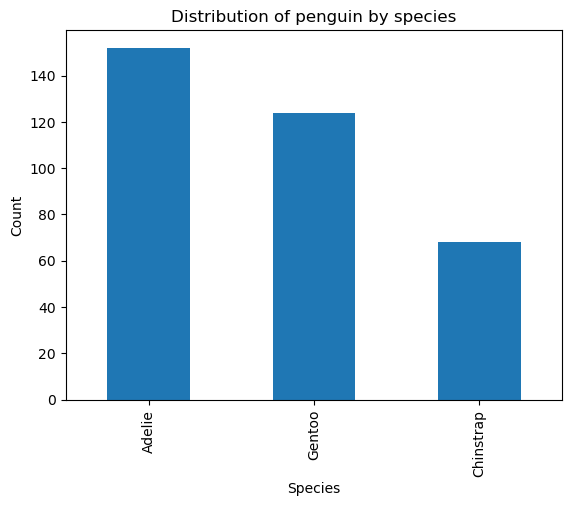

In [156]:
# Creating the species bar plot
data["species"].value_counts().plot(kind="bar")
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of penguin by species")
plt.show()

The Chinstrap species has a significantly lower number of samples compred to Adelie and Gentoo. Adelie has the highest number of species samples

**d. How do the sizes of the different penguin species (Adelie, Gentoo, Chinstrap) compare in terms of culmen length, culmen depth, flipper length, and body mass? Are there any significant differences between species?**

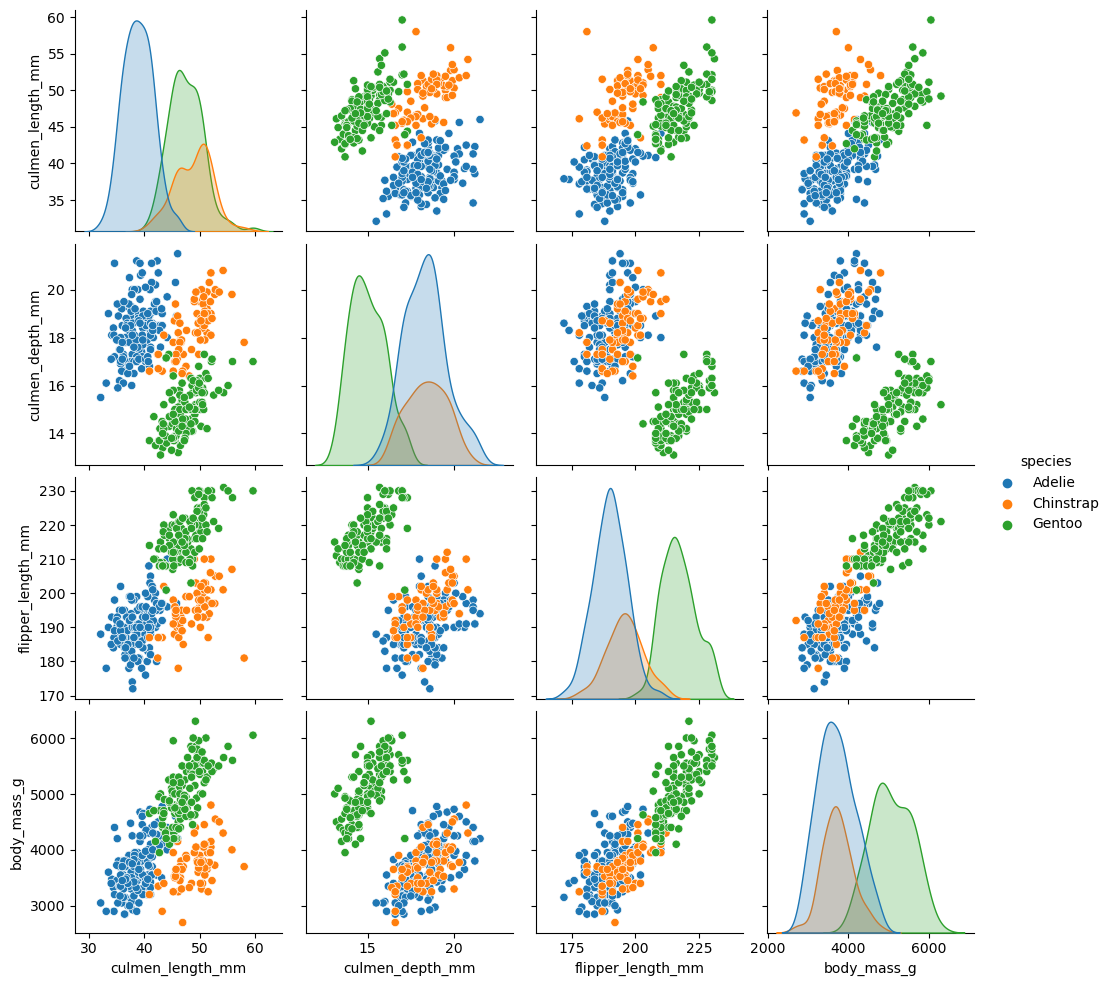

In [157]:
# Creating a plot compare details on the penguin data
sns.pairplot(data, hue="species")
plt.show()

The following observations can be made based on the sizes of the species:
- The Gentoo species has the largest flipper length and body mass of the three species
- Adelie has the smallest culmen_length_mm
- Gentoo has the smallest culmen_length_mm relative to culmen_depth_mm
- Gentoo has the smallest flipper_length_mm relative to culmen_depth_mm
- Otherwise, Gentoo has the largest size measurements in all the three species
- Adelie has the smallest size measurements in all the three species
- Chinstrap as median size measurements for all the three species

**e. Are there any noticeable trends or correlations between flipper length and body mass for penguins? Does this trend differ by species?**

<Axes: >

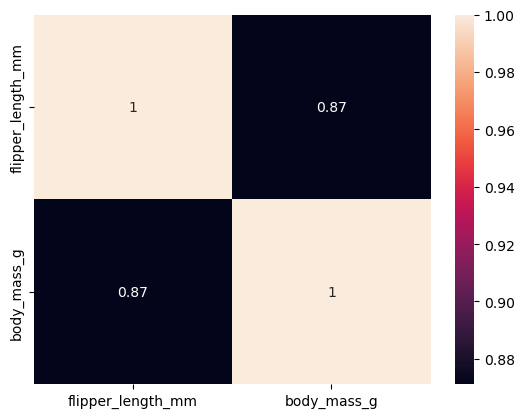

In [158]:
flipper_mass_data = data[["flipper_length_mm", "body_mass_g"]]
flipper_mass_corr = flipper_mass_data.corr(numeric_only = True)
# Plot the heatmap
sns.heatmap(flipper_mass_corr, annot = True)

There is a strong correlation of 0.87 between flipper length and body mass for penguins.

In [159]:
flipper_mass_data_grp = data.groupby("species")[["flipper_length_mm", "body_mass_g"]]
flipper_mass_species_corr = flipper_mass_data_grp.corr()
flipper_mass_species_corr

flipper_length_mm  body_mass_g
species                                                    
Adelie    flipper_length_mm           1.000000     0.474054
          body_mass_g                 0.474054     1.000000
Chinstrap flipper_length_mm           1.000000     0.641559
          body_mass_g                 0.641559     1.000000
Gentoo    flipper_length_mm           1.000000     0.711209
          body_mass_g                 0.711209     1.000000

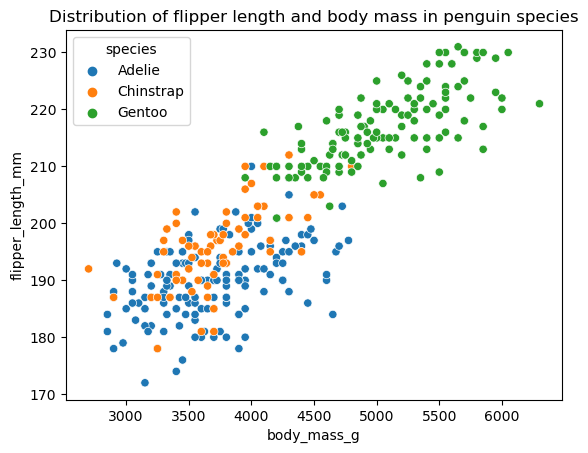

In [160]:
plt.title("Distribution of flipper length and body mass in penguin species")
sns.scatterplot(data, x="body_mass_g", y="flipper_length_mm", hue="species")
plt.show()

**Observations**

**Adelie**
 - There is a moderately strong positive relationship between flipper length and body mass, where flipper length increases slightly as body mass increases
 - This species generally has the smallest body mass in all the three species
 - There is a moderate correlation of 0.47 between flipper length and body mass in the Adelie species
 
**Chinstrap**
 - There is a moderately strong positive relationship between flipper length and body mass, where flipper length increases slightly as body mass increases
 - The species has the median body mass in all the three species. Body sizes are in the same range as those for Adelie, but a few being in the range of the smaller Gentoo species
 - There is a strong correlation of 0.64 between flipper length and body mass in the Chinstrap species
 
**Gentoo species**
- There is a strong positive relationship between flipper length and body mass, where body mass increases significantly as body mass increases
- The species generally has the highest body mass in all the three species
- There is also a strong correlation of 0.71 between flipper length and body mass in the Gentoo species

**f. Investigate the distribution of male and female penguins to determine if there's an even representation of genders in the dataset.**

Validate the values in the sex data

In [161]:
data["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Handle the column with the fullstop as sex

In [162]:
# Drop the column with gender as a full stop
data["sex"] = data["sex"].replace(["."], data["sex"].mode()[0])

Validate the replacement

In [163]:
data["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

Plot the distribution of the gender

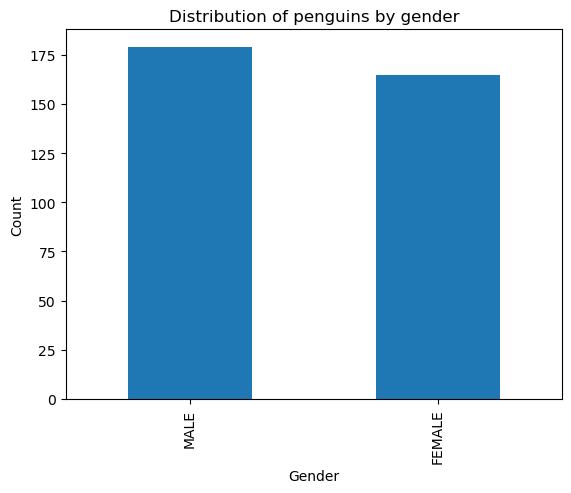

In [164]:
# Creating the species bar plot
data["sex"].value_counts().plot(kind = "bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of penguins by gender")
plt.show()

Find the absolute value of the difference in count between male and female values

In [165]:
difference = abs(data["sex"].value_counts().diff()[1])
print(f"Difference in count is {difference}")

Difference in count is 14.0


There is a difference of 13 values in the distribution by sex. Though the data contains more male samples than female, we need to consider that we we replaced 10 null values and one invalid value in the dataset to 'MALE'. Therefore, there is a fairly even distribution of male and penguins in the database.

**g. How does gender (male or female) affect the penguin size characteristics? Do males and females of the same species exhibit significant differences in size measurements?**

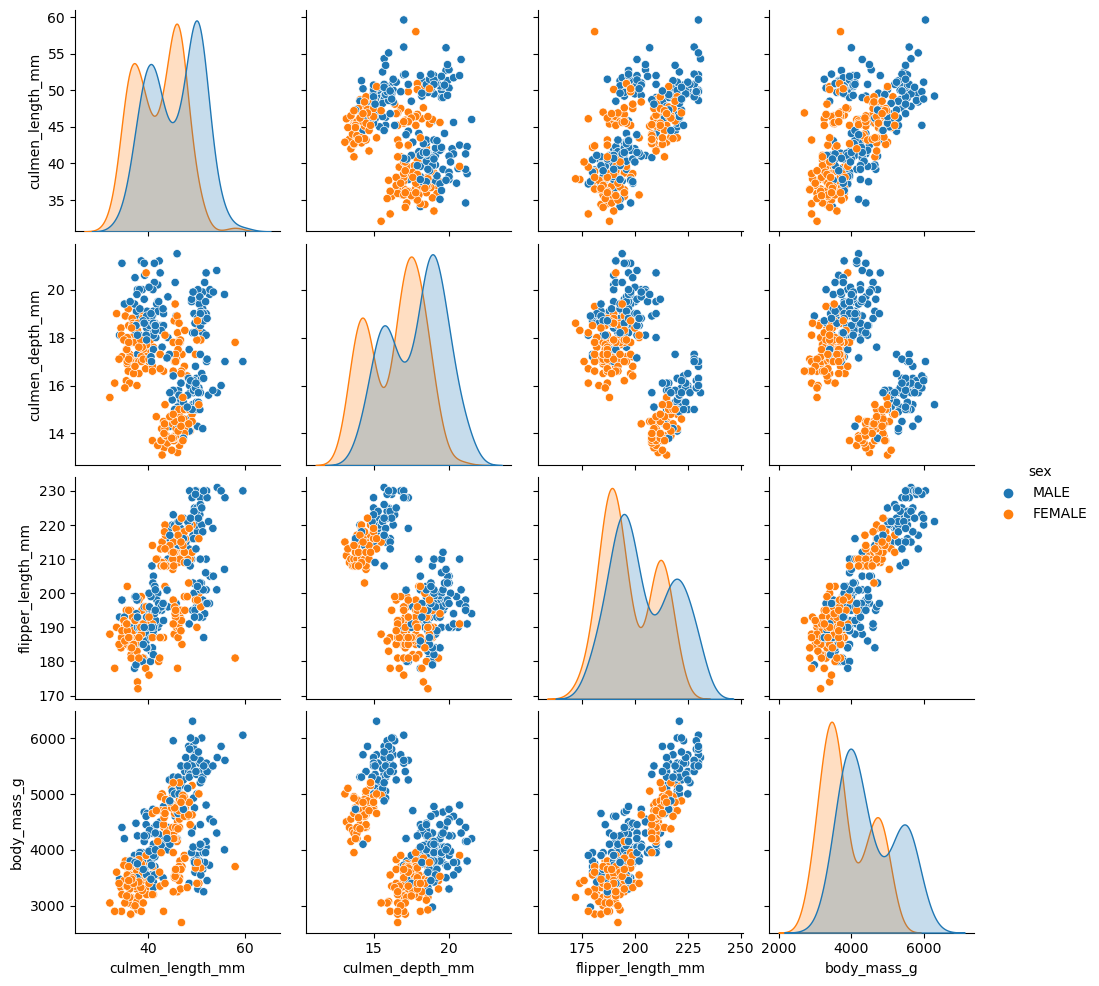

In [166]:
# Creating a plot compare details on the penguin data
sns.pairplot(data, hue="sex")
plt.show()

- Overall, male penguins have larger size measurements than female penguins
- Across all scatter plots, male penguins have higher body masses and size measurements.
- Across all distribution plots, the male data is to the right of female data indicating greater size measurements. For flipper length, some female penguins have larger size measurements than male penguins.

**h. Is there a relationship between the island where penguins were found (Torgersen, Biscoe, Dream) and their size characteristics?**

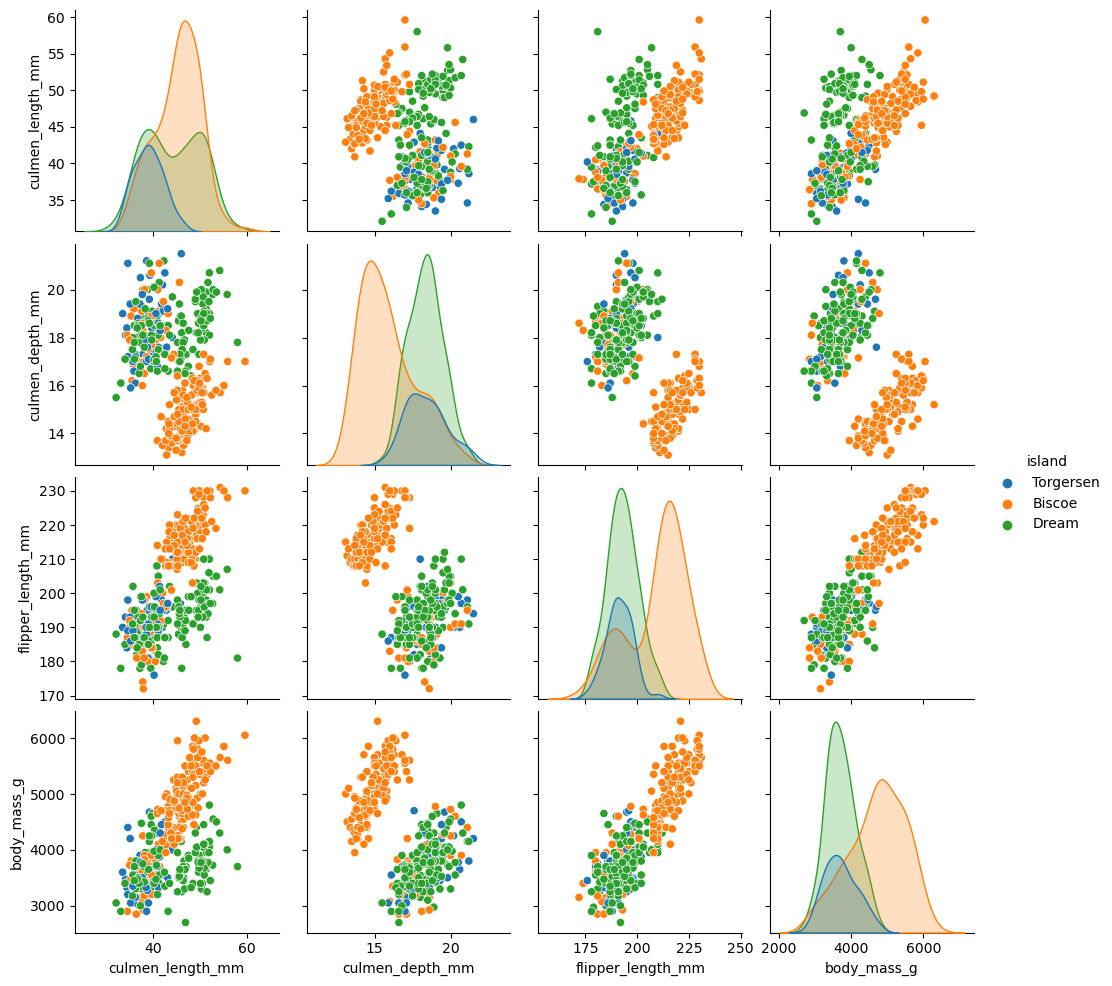

In [167]:
# Creating a plot compare details on the penguin data
sns.pairplot(data, hue="island")
plt.show()

**i. Are there any outliers in the dataset for size measurements, and if so, can they be explained?**

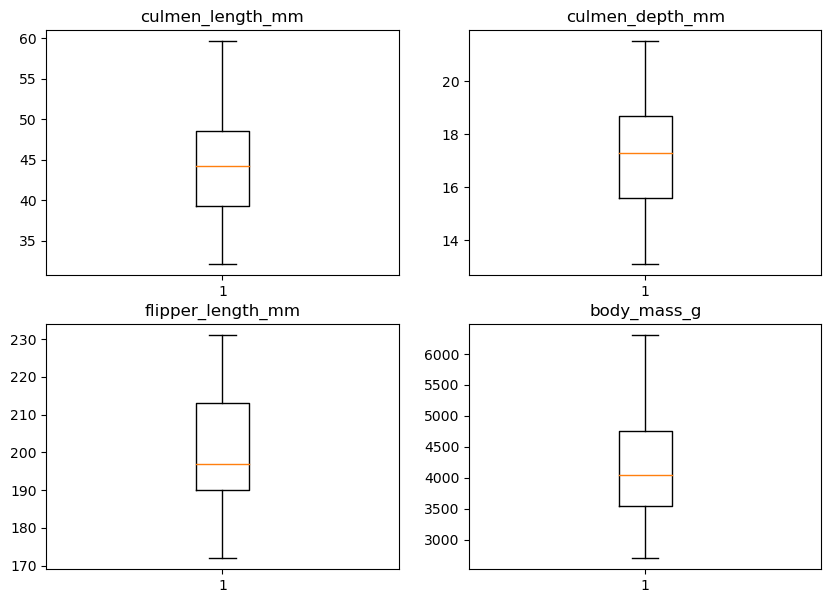

In [168]:
# Creating the species bar plot
plt.figure(figsize =(10, 7))

#Create a subplot and boxplot for the four characteristics
plt.subplot(2,2,1)
plt.boxplot(data["culmen_length_mm"])
plt.title("culmen_length_mm")

plt.subplot(2,2,2)
plt.boxplot(data["culmen_depth_mm"])
plt.title("culmen_depth_mm")

plt.subplot(2,2,3)
plt.boxplot(data["flipper_length_mm"])
plt.title("flipper_length_mm")

plt.subplot(2,2,4)
plt.boxplot(data["body_mass_g"])
plt.title("body_mass_g")

plt.show()

From the boxplots above, we can conclude that there are no outliers in the dataset. All the data falls within the range of the boxes specified.